<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

In [5]:
df = pd.read_csv("airline_passengers.csv",index_col = 'Month',parse_dates = True)

<Axes: xlabel='Month'>

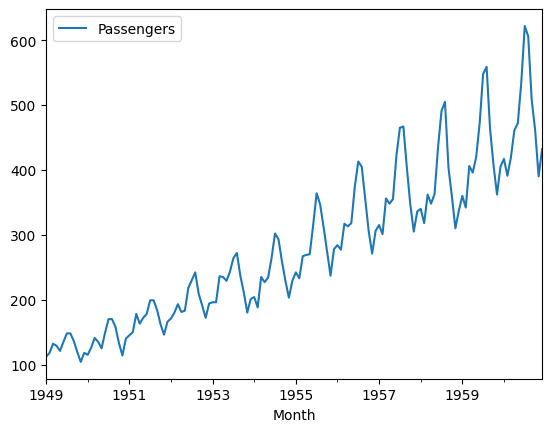

In [6]:
df.plot()

In [7]:
adfuller(df['Passengers'])

(0.8153688792060498,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [8]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistics: ",res[0])
  print("P-Value: ",res[1])

  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-stationary")

In [10]:
adf(df['Passengers'])

Test-Statistics:  0.8153688792060498
P-Value:  0.991880243437641
Non-stationary


In [11]:
adf(np.random.randn(100))

Test-Statistics:  -3.1274100400811866
P-Value:  0.02459010739727776
Stationary


In [13]:
adf(np.random.gamma(1,1,100))

Test-Statistics:  -5.524815213363385
P-Value:  1.842894014479768e-06
Stationary


In [14]:
df['LogPassengers'] = np.log(df['Passengers'])

In [15]:
adf(df['LogPassengers'])

Test-Statistics:  -1.7170170891069683
P-Value:  0.4223667747703874
Non-stationary


In [16]:
df['Diff'] = df['Passengers'].diff()

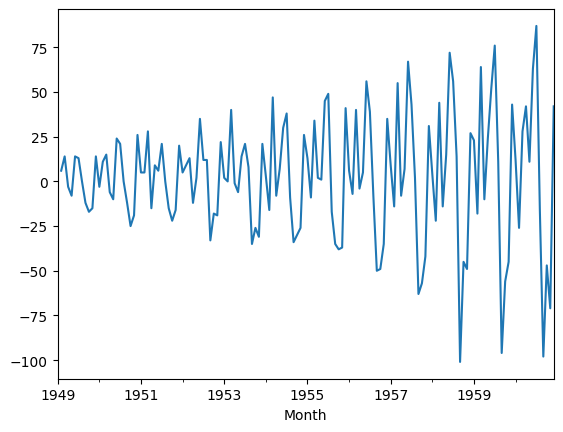

In [18]:
df['Diff'].plot();

In [19]:
adf(df['Diff'].dropna())

Test-Statistics:  -2.8292668241700047
P-Value:  0.05421329028382478
Non-stationary


In [20]:
df['DiffLog'] = df['LogPassengers'].diff()

<Axes: xlabel='Month'>

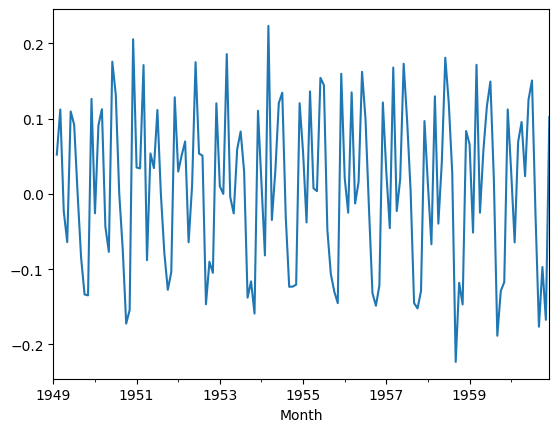

In [21]:
df['DiffLog'].plot()

In [22]:
adf(df['DiffLog'].dropna())

Test-Statistics:  -2.717130598388114
P-Value:  0.07112054815086184
Non-stationary


In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

In [25]:
!head sp500sub.csv

Date,Open,High,Low,Close,Adj Close,Volume,Name
2010-01-04,9.220000267028807,9.510000228881836,9.170000076293944,9.5,9.5,1865400.0,INCY
2010-01-05,9.510000228881836,10.289999961853027,9.449999809265137,10.270000457763672,10.270000457763672,7608900.0,INCY
2010-01-06,10.380000114440918,11.09000015258789,10.350000381469727,11.0,11.0,8046700.0,INCY
2010-01-07,11.0,11.0600004196167,10.619999885559082,10.81999969482422,10.81999969482422,3680300.0,INCY
2010-01-08,10.81999969482422,11.0,10.75,10.9399995803833,10.9399995803833,1529300.0,INCY
2010-01-11,10.960000038146973,11.239999771118164,10.880000114440918,11.09000015258789,11.09000015258789,2280600.0,INCY
2010-01-12,10.989999771118164,11.0,10.34000015258789,10.359999656677246,10.359999656677246,4204600.0,INCY
2010-01-13,10.359999656677246,10.460000038146973,10.039999961853027,10.329999923706056,10.329999923706056,2134900.0,INCY
2010-01-14,10.3100004196167,10.390000343322754,10.079999923706056,10.15999984741211,10.15999984741211,2889600.0,INCY

In [26]:
stock = pd.read_csv("sp500sub.csv",index_col = "Date",parse_dates = True)

In [27]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [28]:
goog = stock[stock['Name'] == "GOOG"][['Close']]

In [29]:
goog['LogPrice'] = np.log(goog['Close'])

In [30]:
goog['LogPriceDiff'] = goog['LogPrice'].diff()

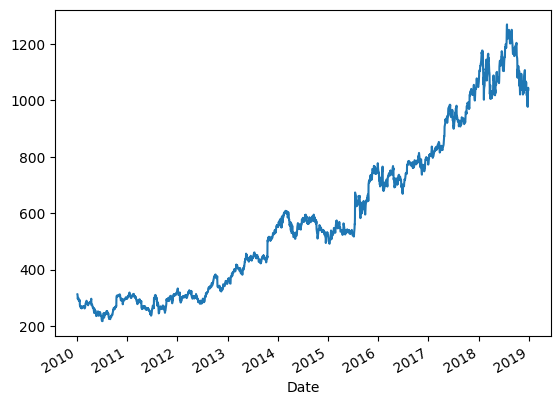

In [32]:
goog['Close'].plot();

<Axes: xlabel='Date'>

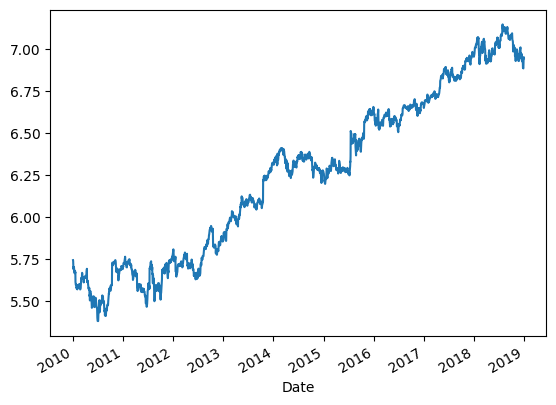

In [31]:
goog['LogPrice'].plot()

<Axes: xlabel='Date'>

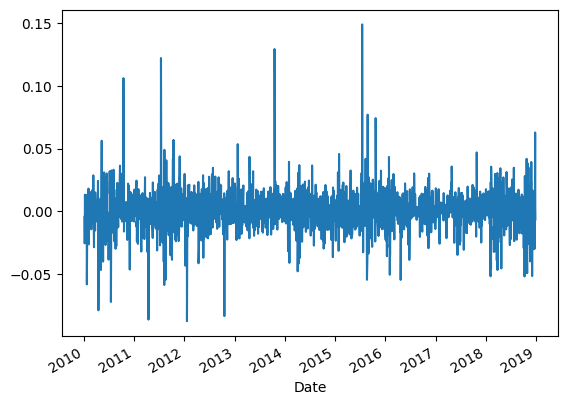

In [33]:
goog['LogPriceDiff'].plot()

In [35]:
adf(goog['LogPrice'])

Test-Statistics:  -0.41819025789061465
P-Value:  0.9070170677498406
Non-stationary


In [37]:
adf(goog['LogPriceDiff'].dropna())

Test-Statistics:  -46.66748022773676
P-Value:  0.0
Stationary


In [38]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
goog.head()

In [58]:
def arima_model(dataset,p,q,r,col,d):
  NTest = 30
  train = dataset.iloc[:-NTest]
  test = dataset.iloc[-NTest:]

  train_idx = dataset.index <= train.index[-1]
  test_idx = dataset.index > test.index[-1]

  arima = ARIMA(train[col],order = (p,q,r))
  arima_result = arima.fit()

  fig,ax = plt.subplots(figsize = (15,5))
  ax.plot(dataset[col],label = 'data')

  #Plot the train set
  train_pred = arima_result.predict(start = train.index[d],end = train.index[-1])
  ax.plot(train.index[d:],train_pred,label = 'fitted')

  #Plot the test set
  prediction_result = arima_result.get_forecast(NTest)
  conf_int = prediction_result.conf_int()
  lower,upper = conf_int[f'lower {col}'],conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index,forecast,label = 'forecast')
  ax.fill_between(test.index,lower,upper, \
                  color = 'red',alpha = 0.3)

  ax.legend()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

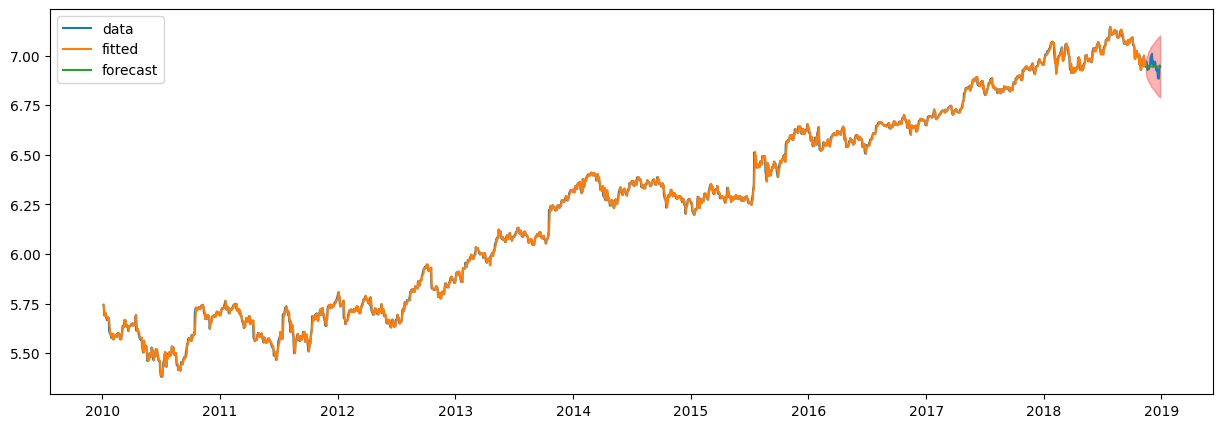

In [63]:
arima_model(goog,12,1,0,'LogPrice',1)

In [65]:
sbux = stock[stock['Name'] == 'SBUX'][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogPriceDiff'] = sbux['LogPrice'].diff()

<Axes: xlabel='Date'>

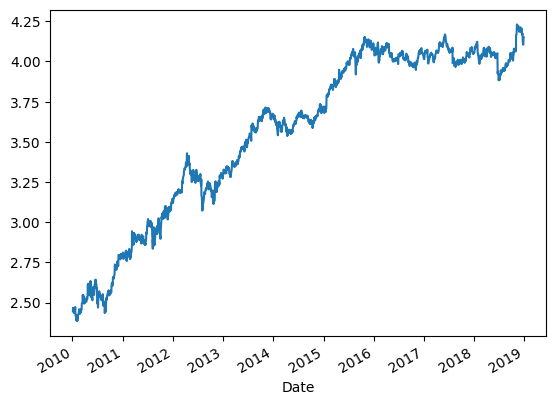

In [66]:
sbux['LogPrice'].plot()

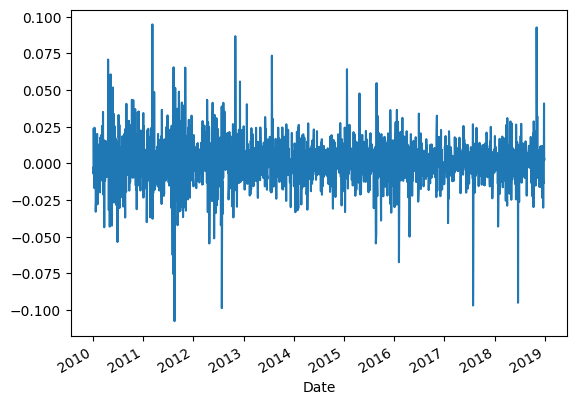

In [67]:
sbux['LogPriceDiff'].plot();

In [68]:
adf(sbux['LogPrice'])

Test-Statistics:  -1.9020133583900034
P-Value:  0.33111455698537456
Non-stationary


In [70]:
adf(sbux['LogPriceDiff'].dropna())

Test-Statistics:  -30.086501426958055
P-Value:  0.0
Stationary
